In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from pathlib import Path
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import scipy.cluster.hierarchy as sch

In [97]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import statsmodels.formula.api as smfa
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# T-Test

In [5]:
cats = pd.read_csv(Path.cwd() / 'data' / 'cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
# null hypo → following to normal distributions
ss.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [7]:
mu = 2.6
# null hypo → following mu
ss.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [8]:
ss.ttest_1samp(cats['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723617)

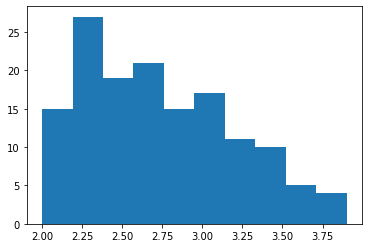

In [9]:
plt.hist(cats['Bwt'])
plt.show()

In [10]:
ss.ttest_1samp(ss.uniform(-1, 1).rvs(100), popmean=0, alternative='two-sided')

Ttest_1sampResult(statistic=-17.331892062898937, pvalue=9.506375244997963e-32)

In [11]:
uni_list = [ss.uniform(0, 1).rvs(100).mean().round(3) for _ in range(1000)]
np.array(uni_list)

array([0.497, 0.536, 0.459, 0.526, 0.507, 0.502, 0.543, 0.512, 0.524,
       0.526, 0.481, 0.49 , 0.483, 0.526, 0.48 , 0.434, 0.492, 0.453,
       0.463, 0.534, 0.476, 0.472, 0.492, 0.506, 0.494, 0.516, 0.483,
       0.488, 0.494, 0.511, 0.525, 0.549, 0.501, 0.472, 0.528, 0.524,
       0.468, 0.447, 0.536, 0.475, 0.487, 0.499, 0.514, 0.461, 0.442,
       0.501, 0.51 , 0.518, 0.463, 0.477, 0.475, 0.481, 0.491, 0.472,
       0.492, 0.502, 0.536, 0.558, 0.497, 0.486, 0.481, 0.469, 0.48 ,
       0.512, 0.454, 0.508, 0.452, 0.502, 0.505, 0.478, 0.484, 0.471,
       0.538, 0.474, 0.539, 0.504, 0.477, 0.518, 0.548, 0.498, 0.518,
       0.462, 0.464, 0.557, 0.524, 0.435, 0.55 , 0.483, 0.491, 0.48 ,
       0.498, 0.454, 0.503, 0.55 , 0.496, 0.526, 0.461, 0.485, 0.463,
       0.496, 0.526, 0.513, 0.504, 0.481, 0.488, 0.541, 0.48 , 0.472,
       0.544, 0.483, 0.513, 0.49 , 0.486, 0.5  , 0.496, 0.534, 0.455,
       0.528, 0.553, 0.488, 0.519, 0.477, 0.469, 0.464, 0.48 , 0.538,
       0.536, 0.577,

(array([ 2.,  4.,  7.,  6., 18., 17., 24., 52., 54., 54., 66., 74., 79.,
        79., 82., 73., 60., 71., 53., 43., 26., 19., 16.,  9.,  4.,  5.,
         1.,  0.,  1.,  1.]),
 array([0.417     , 0.42313333, 0.42926667, 0.4354    , 0.44153333,
        0.44766667, 0.4538    , 0.45993333, 0.46606667, 0.4722    ,
        0.47833333, 0.48446667, 0.4906    , 0.49673333, 0.50286667,
        0.509     , 0.51513333, 0.52126667, 0.5274    , 0.53353333,
        0.53966667, 0.5458    , 0.55193333, 0.55806667, 0.5642    ,
        0.57033333, 0.57646667, 0.5826    , 0.58873333, 0.59486667,
        0.601     ]),
 <BarContainer object of 30 artists>)

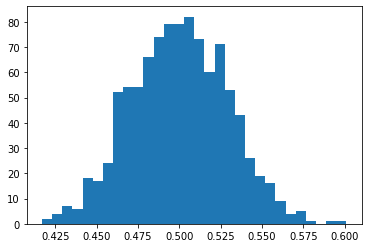

In [12]:
plt.hist(np.array(uni_list), bins=30)

In [13]:
uni_list_mean = np.array(uni_list).mean()
uni_list_mean

0.499991

In [14]:
ss.ttest_1samp(uni_list, popmean=0.5, alternative='two-sided')

Ttest_1sampResult(statistic=-0.009766881452582315, pvalue=0.9922092299856154)

In [15]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [16]:
ss.shapiro(data['before'])

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)

In [17]:
ss.ttest_rel(data['after'], data['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

In [18]:
female = cats.loc[cats['Sex'] == 'F', 'Bwt']
male = cats.loc[cats['Sex'] == 'M', 'Bwt']
female.shape, male.shape

((47,), (97,))

In [19]:
# null hypo → equal variance
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [20]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [21]:
# ANOVA

In [22]:
iris = pd.read_csv(Path.cwd() / 'data' / 'iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
target_list = iris['target'].unique()
setosa = iris.loc[iris['target'] == target_list[0], 'sepal width']
versicolor = iris.loc[iris['target'] == target_list[1], 'sepal width']
virginica = iris.loc[iris['target'] == target_list[2], 'sepal width']
iris_kind = setosa, versicolor, virginica

<AxesSubplot:xlabel='target', ylabel='sepal width'>

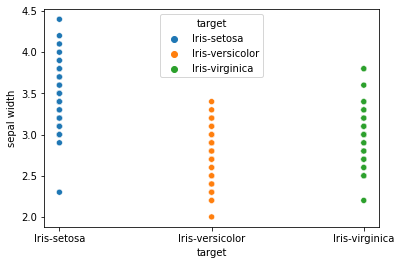

In [24]:
sns.scatterplot(data=iris, x='target', y='sepal width', hue='target')

In [25]:
for kind in iris_kind:
    print(ss.shapiro(kind))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [26]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [27]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [28]:
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukey_hsd = mc.tukeyhsd(alpha=0.05)
tukey_hsd

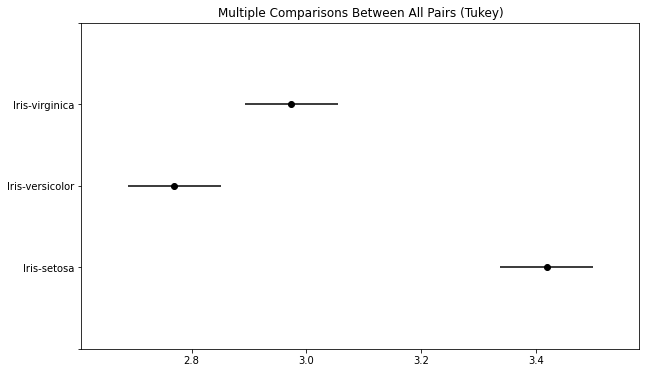

In [29]:
fig = tukey_hsd.plot_simultaneous()

In [30]:
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [31]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [32]:
pg.welch_anova(data=iris, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [33]:
mtcars = pd.read_csv(Path.cwd() / 'data' / 'mtcars.csv').loc[:, ['mpg', 'am', 'cyl']]
mtcars.head()

,mpg,am,cyl
0,21.0,1,6
1,21.0,1,6
2,22.8,1,4
3,21.4,0,6
4,18.7,0,8


In [34]:
formula = 'mpg ~ C(am) + C(cyl) + C(am):C(cyl)'
model = smfa.ols(formula, data=mtcars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     19.29
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.18e-08
Time:                        11:55:02   Log-Likelihood:                -77.582
No. Observations:                  32   AIC:                             167.2
Df Residuals:                      26   BIC:                             176.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 22.9000      1.751     13.081      0.000      19.301      26.499
C(am)[T.1]                 5.1750      2.053      2.521      0.018       0.955       9.395
C(cyl)[T.6]               -3.7750      2.316     -1.630      0.115      -8.535       0.985
C(cyl)[T.8]               -7.8500      1.957     -4.011      0.000     -11.873      -3.827
C(am)[T.1]:C(cyl)[T.6]    -3.7333      3.095     -1.206      0.239     -10.095       2.628
C(am)[T.1]:C(cyl)[T.8]    -4.8250      3.095     -1.559      0.131     -11.186       1.536
==============================================================================
Omnibus:                        1.456   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                0.665
Skew:                          -0.328   Prob(JB):                        0.717
Kurtosis:                       3.262   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# null hypo → no difference btw dependent, no interaction
# when no interaction, difference btw dependent has meaning
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am):C(cyl),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


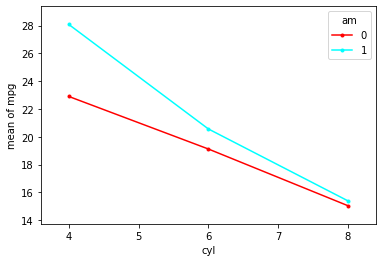

In [36]:
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
# parameter_order = x1, x2, y
fig = interaction_plot(cyl, am, mpg)

In [37]:
tit_df = pd.read_csv(Path.cwd() / 'data' / 'titanic.csv')
tit_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [38]:
sex = ['female', 'male']

In [39]:
tit_df.loc[:, 'sex'].value_counts(normalize=True, sort=False).reindex(sex)

female    0.352413
male      0.647587
Name: sex, dtype: float64

In [40]:
tit_df.loc[tit_df['survived'] == 1, :].shape[0]

342

In [41]:
exp = (tit_df.loc[:, 'sex'].value_counts(normalize=True, sort=False).reindex(sex) * tit_df.loc[tit_df['survived'] == 1, :].shape[0]).round(0)
obs = tit_df.loc[tit_df['survived'] == 1, 'sex'].value_counts(sort=False).reindex(sex)

In [42]:
ss.chisquare(obs, exp)

Power_divergenceResult(statistic=160.4296024830784, pvalue=9.115618306375346e-37)

In [43]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [44]:
chi2, p, ddof, expected = ss.chi2_contingency(table)
chi2, p, ddof, expected

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [45]:
house_df = pd.read_csv(Path.cwd() / 'data' / 'kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [46]:
house = house_df[['price', 'sqft_living']]
house.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [47]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula, data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:55:02   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model.params

Intercept     -43580.743094
sqft_living      280.623568
dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

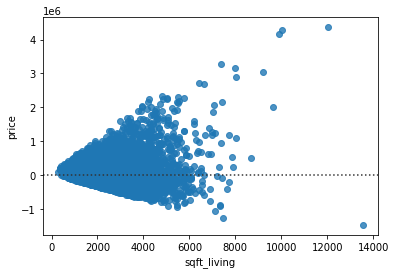

In [49]:
# heteroscedasticity를 어떻게 처리?
# sqft_living을 범주형으로 세분화한 뒤 각각의 sigma를 구해서 나눠주는 방법이 괜찮을듯?
# 다만 어차피 다중회귀분석이 있으므로 굳이 신경쓸 필요는 x인듯
sns.residplot(house, x='sqft_living', y='price')

In [50]:
formula = 'price ~ sqft_living'
model = smfa.gls(formula, data=house).fit()
model.summary(), model.params

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             GLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.493
 Model:                            GLS   Adj. R-squared:                  0.493
 Method:                 Least Squares   F-statistic:                 2.100e+04
 Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
 Time:                        11:55:03   Log-Likelihood:            -3.0027e+05
 No. Observations:               21613   AIC:                         6.005e+05
 Df Residuals:                   21611   BIC:                         6.006e+05
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------------

In [51]:
ss.shapiro(house['price'])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7120139598846436, pvalue=0.0)

In [52]:
cars = pd.read_csv(Path.cwd() / 'data' / 'Cars93.csv')
cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [53]:
cars.columns = [column.replace('.', '_') for column in cars.columns]

In [54]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPG_city + MPG_highway'
model = smfa.ols(formula, data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.88e-14
Time:                        11:55:03   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize      4.4732      1.410      3.172      0.002       1.670       7.276
RPM             0.0071      0.001      5.138      0.000       0.004       0.010
Weight          0.0056      0.003      1.634      0.106      -0.001       0.012
Length         -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPG_city       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPG_highway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
y, X = dmatrices(formula, data=cars, return_type='dataframe')
X

,Intercept,EngineSize,RPM,Weight,Length,MPG_city,MPG_highway
0,1.0,1.8,6300.0,2705.0,177.0,25.0,31.0
1,1.0,3.2,5500.0,3560.0,195.0,18.0,25.0
2,1.0,2.8,5500.0,3375.0,180.0,20.0,26.0
3,1.0,2.8,5500.0,3405.0,193.0,19.0,26.0
4,1.0,3.5,5700.0,3640.0,186.0,22.0,30.0
...,...,...,...,...,...,...,...
88,1.0,2.5,4500.0,3960.0,187.0,17.0,21.0
89,1.0,2.0,5800.0,2985.0,180.0,21.0,30.0
90,1.0,2.8,5800.0,2810.0,159.0,18.0,25.0
91,1.0,2.3,5400.0,2985.0,190.0,21.0,28.0


In [56]:
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variables'])

,vif,variables
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPG_city
5,12.943133,MPG_highway


In [57]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPG_highway'
model = smfa.ols(formula, data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.28e-14
Time:                        11:55:03   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize      4.6591      1.386      3.361      0.001       1.904       7.415
RPM             0.0071      0.001      5.173      0.000       0.004       0.010
Weight          0.0053      0.003      1.567      0.121      -0.001       0.012
Length         -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPG_highway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model.params

Intercept     -35.812248
EngineSize      4.659085
RPM             0.007089
Weight          0.005298
Length         -0.019382
MPG_highway    -0.249999
dtype: float64

In [59]:
y, X = dmatrices(formula, data=cars, return_type='dataframe')
X

,Intercept,EngineSize,RPM,Weight,Length,MPG_highway
0,1.0,1.8,6300.0,2705.0,177.0,31.0
1,1.0,3.2,5500.0,3560.0,195.0,25.0
2,1.0,2.8,5500.0,3375.0,180.0,26.0
3,1.0,2.8,5500.0,3405.0,193.0,26.0
4,1.0,3.5,5700.0,3640.0,186.0,30.0
...,...,...,...,...,...,...
88,1.0,2.5,4500.0,3960.0,187.0,21.0
89,1.0,2.0,5800.0,2985.0,180.0,30.0
90,1.0,2.8,5800.0,2810.0,159.0,25.0
91,1.0,2.3,5400.0,2985.0,190.0,28.0


In [60]:
model.params

Intercept     -35.812248
EngineSize      4.659085
RPM             0.007089
Weight          0.005298
Length         -0.019382
MPG_highway    -0.249999
dtype: float64

In [61]:
y_hat = np.dot(X.iloc[:, 1:].values, model.params.values[1:].reshape(-1, 1)) + model.params['Intercept']
y_hat

array([[20.38614791],
       [26.91786987],
       [24.11493316],
       [24.02188707],
       [29.0817153 ],
       [15.14597138],
       [23.42709055],
       [30.41167078],
       [23.84829196],
       [25.01786724],
       [38.79739142],
       [11.96562417],
       [13.98962352],
       [19.06283468],
       [17.14024405],
       [26.40138847],
       [25.14155681],
       [27.32393206],
       [34.37747395],
       [24.82246445],
       [19.40765059],
       [22.0691494 ],
       [14.11534785],
       [12.02725134],
       [15.33978693],
       [24.59715993],
       [15.70930686],
       [31.36935468],
       [14.24778572],
       [29.18590187],
       [ 4.48235557],
       [21.24324642],
       [ 8.74858454],
       [11.87378281],
       [15.88420522],
       [23.56883134],
       [18.58674456],
       [25.71096331],
       [ 2.80874666],
       [10.85746413],
       [20.05738207],
       [10.59961319],
       [18.90684402],
       [11.08428024],
       [18.40596324],
       [10

<AxesSubplot:>

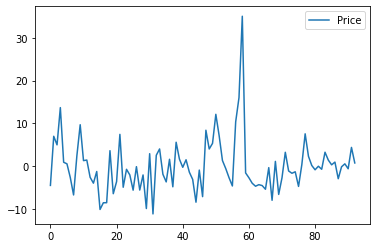

In [62]:
(y - y_hat).plot()

In [63]:
resid = y - y_hat
resid.mean(), resid.std()

(Price    9.230389e-12
 dtype: float64,
 Price    6.343372
 dtype: float64)

<AxesSubplot:ylabel='Frequency'>

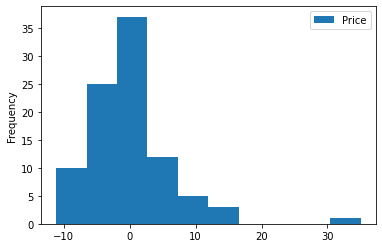

In [64]:
resid.sort_values('Price').plot.hist()

In [65]:
us = pd.read_csv(Path.cwd() / 'data' / 'USArrests.csv').rename({'Unnamed: 0':'State'}, axis=1).set_index('State')
us.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [66]:
label_list = us.index.to_list()
np.array(label_list)

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='<U14')

In [67]:
single = sch.linkage(us, method='single', metric='euclidean')
single.shape

(49, 4)

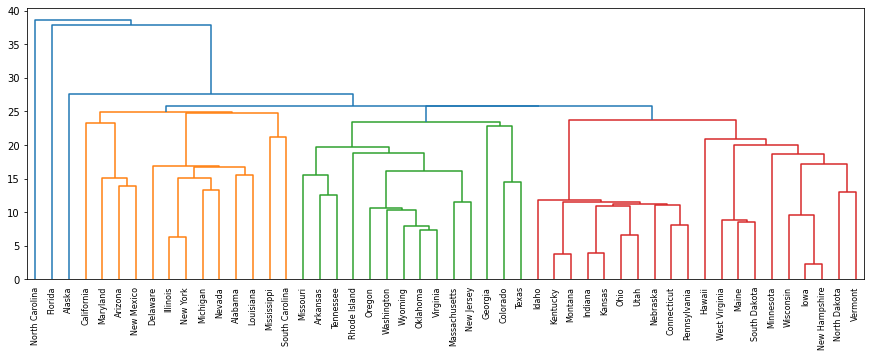

In [68]:
plt.figure(figsize=(15, 5))
sch.dendrogram(single, labels=label_list, color_threshold=25)
plt.show()

In [69]:
ward = sch.linkage(us, method='ward', metric='euclidean')
ward.shape

(49, 4)

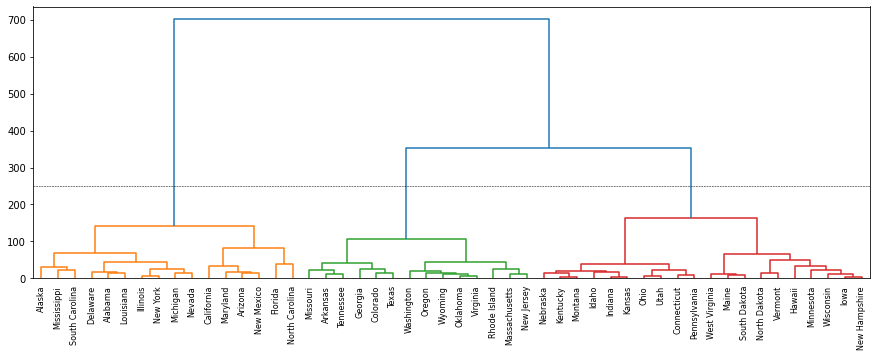

In [70]:
plt.figure(figsize=(15, 5))
sch.dendrogram(ward, labels=label_list, color_threshold=250)
plt.axhline(y=250, color='k', linewidth=0.5, linestyle='--')
plt.show()

In [71]:
cluster = sch.fcluster(ward, t=250, criterion='distance')
cluster

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [72]:
us_cluster = us.assign(**{'Cluster':cluster})
us_cluster.head()

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [73]:
us_cluster.groupby('Cluster').agg(['mean', 'std', 'count'])

Murder                     Assault                    UrbanPop  \
              mean       std count        mean        std count       mean   
Cluster                                                                      
1        11.812500  2.795920    16  272.562500  31.052576    16  68.312500   
2         8.214286  3.944199    14  173.285714  22.182559    14  70.642857   
3         4.270000  2.303795    20   87.550000  28.158340    20  59.750000   

                               Rape                  
               std count       mean       std count  
Cluster                                              
1        15.490723    16  28.375000  9.602882    16  
2        11.849097    14  22.842857  7.402361    14  
3        13.924137    20  14.390000  4.669148    20

In [76]:
for i in range(2, 10):
    cluster = KMeans(n_clusters=i, random_state=0).fit(us.values)
    labels = cluster.labels_
    print(f'{calinski_harabasz_score(us.values, labels)}, k = {i}')

129.16750641095095, k = 2
150.82736111645258, k = 3
141.76241251642006, k = 4
152.68636141181392, k = 5
158.03230599203238, k = 6
157.7352235195143, k = 7
153.39924600581767, k = 8
158.3968803410938, k = 9


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\clust

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\clust

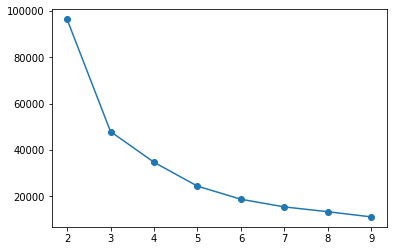

In [80]:
inertia = []
for i in range(2, 10):
    cluster = KMeans(n_clusters=i, random_state=0).fit(us.values)
    inertia.append(cluster.inertia_)

plt.plot(inertia, marker='o')
plt.xticks(ticks=range(8), labels=range(2, 10))
plt.show()

In [82]:
km = KMeans(n_clusters=3, random_state=0).fit(us.values)
km.labels_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1])

In [84]:
adjusted_rand_score(us_cluster['Cluster'], km.labels_)

1.0

In [91]:
group1 = us_cluster.loc[us_cluster['Cluster'] == 1, 'Murder']
group2 = us_cluster.loc[us_cluster['Cluster'] == 2, 'Murder']
group3 = us_cluster.loc[us_cluster['Cluster'] == 3, 'Murder']

In [92]:
ss.shapiro(group1), ss.shapiro(group2), ss.shapiro(group3)

(ShapiroResult(statistic=0.9742740392684937, pvalue=0.9021732211112976),
 ShapiroResult(statistic=0.9133870005607605, pvalue=0.1764679104089737),
 ShapiroResult(statistic=0.9315951466560364, pvalue=0.16572006046772003))

In [93]:
ss.levene(group1, group2, group3)

LeveneResult(statistic=1.05947080431512, pvalue=0.3547710352324945)

In [94]:
ss.f_oneway(group1, group2, group3)

F_onewayResult(statistic=28.46903760642193, pvalue=7.945018551345298e-09)

In [95]:
mc = MultiComparison(data=us_cluster['Murder'], groups=us_cluster['Cluster'])
tukey_hsd = mc.tukeyhsd(alpha=0.05)
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-3.5982,0.0053,-6.2469,-0.9496,True
1,3,-7.5425,0.0,-9.97,-5.115,True
2,3,-3.9443,0.0012,-6.4663,-1.4223,True


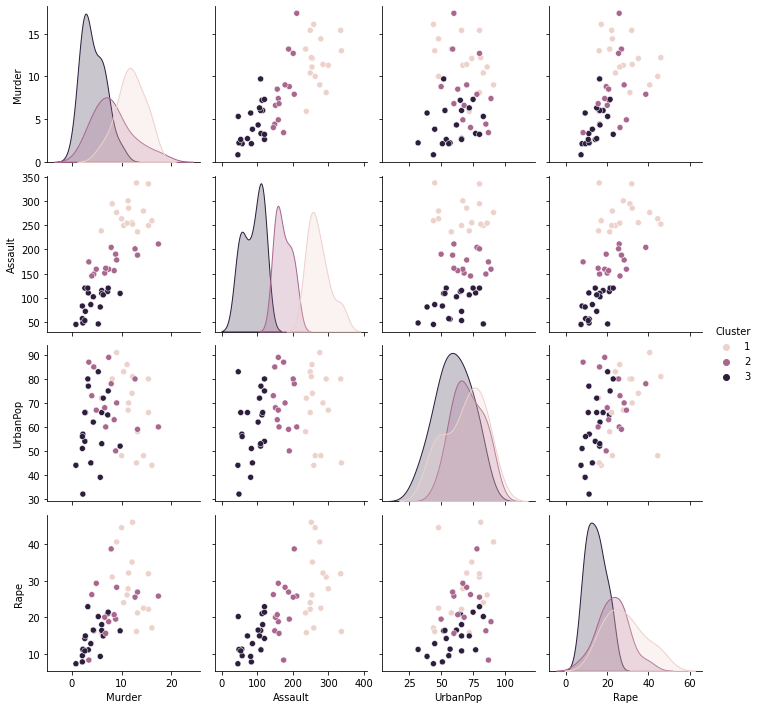

In [96]:
sns.pairplot(data=us_cluster, hue='Cluster')

In [98]:
for column in us.columns:
    print(ss.shapiro(us[column]))

ShapiroResult(statistic=0.9570268988609314, pvalue=0.06674208492040634)
ShapiroResult(statistic=0.951815128326416, pvalue=0.04052506387233734)
ShapiroResult(statistic=0.9771350622177124, pvalue=0.43845951557159424)
ShapiroResult(statistic=0.9467371106147766, pvalue=0.025097200646996498)


In [100]:
gmm = GaussianMixture(n_components=3, max_iter=1000).fit(us.values)
gmm.predict(us.values)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0], dtype=int64)

In [101]:
adjusted_rand_score(us_cluster['Cluster'], gmm.predict(us.values))

0.6240347230606097

In [102]:
us_cluster = us_cluster.assign(Cluster2=gmm.predict(us.values))

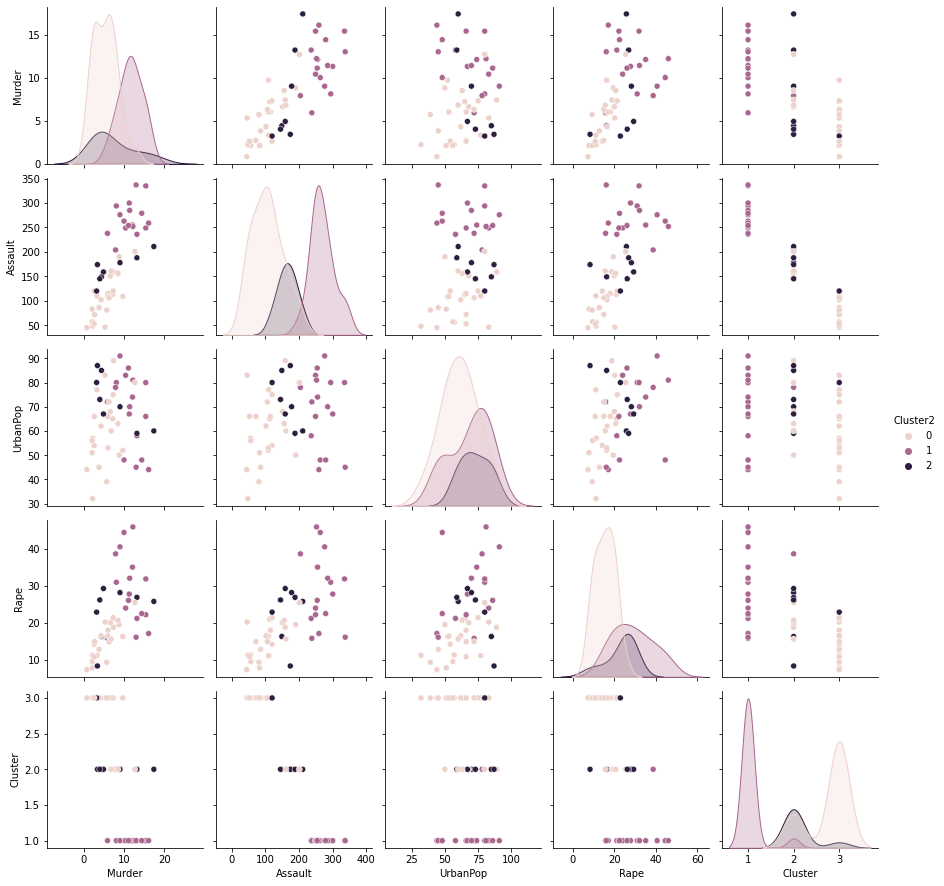

In [106]:
sns.pairplot(data=us_cluster, hue='Cluster2')